In [16]:
%%html
Un caso di studio che utilizzi il machine learning include i seguenti passi: 
<ul>
    <li>Caricare il dataset</li>
    <li>Esplorare i dati con Pandas e visualizzarli</li>
    <li>Trasformare i dati: convertire dati non numerici in dati numerici</li>
    <li>Dividere i dati per l’addestramento e il testing</li>
    <li>Creare il modello</li>
    <li>Addestrare e testare il modello</li>
    <li>Ottimizzare il modello e valutarne l’accuratezza</li>
    <li>Effettuare previsioni su dati che il modello non ha mai visto</li>
</ul>

<h1>COME TRATTARE PARAMETRI SBAGLIATI O MANCANTI</h1>
<b>Pandas</b>--> per supportare tipi di dati misti,  indicizzazione personalizzata, dati mancanti, dati inconsistenti e dati che necessitano manipolazioni in forme  appropriate per le basi di dati e i pacchetti di analisi dei dati utilizzati. 
Questa libreria fornisce due collezioni: <b>Series</b> per collezioni monodimensionali e <b>DataFrame</b> per collezioni bidimensionali.

<h2>Series</h2>
Un oggetto Series è un array monodimensionale potenziato. Mentre gli indici degli array sono sempre  interi che partono da zero, gli oggetti Series supportano la personalizzazione degli indici, con la possibilità  di definire anche indici non interi, come le stringhe.

In [1]:
#per creare array monodimensionali, in cui gli indici sono interi
import pandas as pd 
grades = pd.Series([87, 100, 94])

#per creare array monodimensionali, in cui gli indici sono personalizzati, basta usare
#modificare il parametro di default index
grades_pers = pd.Series([87, 100, 94], index=['Wally', 'Eva', 'Sam'])

#Se usiamo un dizionario per inizializzare un oggetto Series, le sue chiavi diventeranno gli indici dell’oggetto  Series, 
# mentre i valori del dizionario diventeranno i valori degli elementi dell’oggetto Series
grades_dicti = pd.Series({'Wally': 87, 'Eva': 100, 'Sam': 94})

print(grades)
print()
print(grades_pers)
print()
print(grades_dicti)

0     87
1    100
2     94
dtype: int64

Wally     87
Eva      100
Sam       94
dtype: int64

Wally     87
Eva      100
Sam       94
dtype: int64


In [2]:
%%html
Per accedere essendo vettori usiamo le parentesi quadate con il relativo indice che usiamo per rappresentare l'identificazione.
E' possibile prodirre statistiche usando i metodi .count(), .mean() ecc. o usare .describe() per vedere tutte le statistiche sull'array.

<h2>DataFrame</h2>
Un oggetto DataFrame è un array bidimensionale potenziato. Come gli oggetti Series, i DataFrame possono avere indici personalizzati per righe e per colonne; offrono operazioni e funzionalità aggiuntive che li rendono utili nelle operazioni comuni nella data science. Anche gli oggetti DataFrame gestiscono dati  mancanti. Ogni colonna in un oggetto DataFrame è un oggetto Series. Ogni colonna può contenere elementi di tipo diverso.

In [3]:
grades_dict = {'Wally': [87, 96, 70], 'Eva': [100, 87, 90], 'Sam': [94, 77, 90], 'Katie': [100, 81, 82], 'Bob': [83, 65, 85]}
grades = pd.DataFrame(grades_dict) 
grades

,Wally,Eva,Sam,Katie,Bob
0,87,100,94,100,83
1,96,87,77,81,65
2,70,90,90,82,85


In [4]:
%%html
Pandas mostra gli oggetti DataFrame in formato tabellare, con gli indici allineati a sinistra nella prima colonna e i valori delle rimanenti colonne allineati a destra. 
Le chiavi del dizionario diventano i nomi delle colonne, mentre i valori associati a ogni chiave diventano i valori degli elementi della colonna corrispondente. A breve  vedremo come “ribaltare” le righe e le colonne. Come impostazione predefinita, gli indici delle righe sono interi generati automaticamente a partire da 0.
avremmo potuto specificare indici personalizzati usando l’argomento denominato index in questo modo:
<div style="text-align: center;">
    pd.DataFrame(grades_dict, index=['Test1', 'Test2', 'Test3'])
</div>
oppure:

In [5]:
grades.index = ['Test1', 'Test2', 'Test3'] 
grades

,Wally,Eva,Sam,Katie,Bob
Test1,87,100,94,100,83
Test2,96,87,77,81,65
Test3,70,90,90,82,85


In [6]:
%%html
L’indicizzazione negli oggetti DataFrame si possa fare con [], ma si raccomanda l’utilizzo degli attributi <b>loc</b>, <b>iloc</b>, <b>at</b> e <b>iat</b>, che sono ottimizzati per accedere agli oggetti DataFrame e forniscono anche funzionalità aggiuntive rispetto a []. La documentazione afferma che l’indicizzazione con [] spesso produce una copia dei dati, il che diventa un errore logico se si assegnano nuovi valori a un oggetto DataFrame ottenuto come risultato di un’operazione []. 
<p>
L’attributo <b>loc</b> permette di accedere a una riga usando la sua etichetta.
L’attributo <b>iloc</b> permette accedere alle righe anche con gli indici interi a partire da 0.
Per ottenere un singolo valore di un oggetto DataFrame si possono usare i suoi attributi <b>at</b> e <b>iat</b>. Come loc  e iloc, anche at usa etichette, mentre iat usa indici interi
</p>

In [7]:
print("uso di loc:\n", grades.loc['Test1'])
print()
print("uso di iloc:\n", grades.iloc[1])
print()
print("uso di loc con slicing:\n", grades.loc['Test1':'Test3'])
print()
print("uso di iloc con slicing:\n", grades.iloc[0:2])


uso di loc:
 Wally     87
Eva      100
Sam       94
Katie    100
Bob       83
Name: Test1, dtype: int64

uso di iloc:
 Wally    96
Eva      87
Sam      77
Katie    81
Bob      65
Name: Test2, dtype: int64

uso di loc con slicing:
        Wally  Eva  Sam  Katie  Bob
Test1     87  100   94    100   83
Test2     96   87   77     81   65
Test3     70   90   90     82   85

uso di iloc con slicing:
        Wally  Eva  Sam  Katie  Bob
Test1     87  100   94    100   83
Test2     96   87   77     81   65


In [8]:
%%html
<p>Una delle capacità di selezione più potenti di Pandas è l’indicizzazione booleana. Ad esempio:</p>
<div style="text-align: center;">
    grades[grades >= 90]
    grades[(grades >= 80) & (grades < 90)]
</div>
<p>Per trasporre righe e colonne, usiamo l’attributo T: <b>grades.T</b>. L’attributo T restituisce una vista trasposta (non una copia) dell’oggetto DataFrame.</p>

<h2>DATA MUNGING</h2>
<p>Il <b>data munging</b> o <b>data wrangling</b> è un processo per la preparazione dei dati per poterli analizzare. Nel data munging, due dei passi più importanti sono:</p>
<ul style="list-style-type: none; padding-left: 0;">
    <li><b>Pulizia dei dati</b></li>
    <li><b>Trasformazione dei dati nel formato più adatto</b> al database e al software di analisi utilizzati.</li>
</ul>
<p>Ecco alcuni tipici esempi di pulizia dei dati:</p>
<ul>
    <li>Cancellare osservazioni con valori mancanti</li>
    <li>Sostituire valori mancanti con valori ragionevoli</li>
    <li>Cancellare osservazioni con valori sbagliati</li>
    <li>Eliminare gli outlier, ovvero i valori anomali (sebbene a volte sia meglio tenerli)</li>
    <li>Eliminare i duplicati (sebbene alcune volte siano valori validi)</li>
    <li>Gestire i dati non coerenti ecc.</li>
</ul>
</div>

<div style="margin-top: 30px;">
<h3>Pulire i dati</h3>
<p>Dati errati o valori mancanti possono avere un impatto significativo sull’analisi dei dati. Alcuni scienziati consigliano di non aggiungere “valori ragionevoli”, ma di evidenziare chiaramente i dati mancanti, lasciando la gestione del problema al pacchetto di analisi dati.
Una maniera comune di pulire i dati consiste nel sostituire la temperatura mancante con un valore ragionevole, come la media delle altre misure. Tuttavia, “sostituire” i dati non deve diventare “truccare” i dati.
La prima regola che si dovrebbe imparare è di non eliminare o cambiare quei valori che contraddicono le loro ipotesi.</p>

<h4>Metodi Pandas per la pulizia dei dati</h4>
<p>Per la pulizia dei dati possiamo usare le regex per identificare certi pattern da eliminare o sostituire con altri che non rispettano le condizioni specificate, oppure usare alcune funzioni della libreria Pandas.</p>
<ul>
    <li><b>Il metodo isnull()</b> serve per identificare i valori mancanti (null) all'interno di un DataFrame o di una Serie. Restituisce un DataFrame o una Serie di booleani (True per valori mancanti, False per valori non mancanti).</li>
    <li><b>Il metodo dropna()</b> viene utilizzato per rimuovere le righe o le colonne che contengono valori mancanti (NaN). Può essere utilizzato come segue:
        <ul>
            <li><b>axis=0</b>: Rimuove le righe (default).</li>
            <li><b>axis=1</b>: Rimuove le colonne.</li>
            <li><b>how='any'</b>: Rimuove la riga o la colonna se contiene qualunque valore mancante (default).</li>
            <li><b>how='all'</b>: Rimuove la riga o la colonna solo se tutti i valori sono mancanti.</li>
            <li><b>thresh</b>: Numero minimo di non-null richiesti per non eliminare una riga o una colonna.</li>
            <li><b>subset</b>: Specifica le colonne in cui cercare i valori mancanti.</li>
            <li><b>inplace=True</b>: Modifica il DataFrame direttamente senza creare una copia.</li>
        </ul>
    </li>
    <li><b>Il metodo fillna()</b> viene utilizzato per sostituire i valori mancanti (NaN) con un valore specifico. Può essere utilizzato per riempire i dati mancanti con un valore ragionevole, come la media, la mediana o un valore predefinito. Ecco i parametri principali:
        <ul>
            <li><b>value</b>: Un valore singolo, dizionario o Serie da usare per sostituire i valori mancanti.</li>
            <li><b>method</b>: Può essere 'ffill' (forward fill) per propagare il valore precedente o 'bfill' (backward fill) per propagare il valore successivo.</li>
            <li><b>axis</b>: Specifica se applicare la sostituzione sulle righe (0) o sulle colonne (1).</li>
            <li><b>inplace=True</b>: Modifica il DataFrame originale senza creare una copia.</li>
        </ul>
    </li>
</ul>

<h4>Metodi per la modifica dei formati dei dati</h4>
<p>Si può usare il metodo <b>map</b> tipico della programmazione funzionale.</p>


In [9]:
# Creazione del DataFrame di esempio
data = {'colonna1': [1, 2, None, 4],
        'colonna2': ['a', None, 'c', 'd']}

df = pd.DataFrame(data)

# 1. Identificare valori mancanti con isnull()
print("1. Identificare valori mancanti (isnull()):")
print(df.isnull())
print()

# 2. Rimuovere righe con valori mancanti (dropna())
print("2. Rimuovere righe con valori mancanti (dropna()):")
df_cleaned_rows = df.dropna()
print(df_cleaned_rows)
print()

# 3. Rimuovere colonne con valori mancanti (dropna(axis=1))
print("3. Rimuovere colonne con valori mancanti (dropna(axis=1)):")
df_cleaned_cols = df.dropna(axis=1)
print(df_cleaned_cols)
print()

# 4. Sostituire i valori mancanti con un valore predefinito (fillna())
print("4. Sostituire i valori mancanti con 0 (fillna()):")
df_filled = df.fillna(0)
print(df_filled)
print()

# 5. Sostituire i valori mancanti con la media della colonna
print("5. Sostituire i valori mancanti con la media della colonna 'colonna1':")
mean_col1 = df['colonna1'].mean()
df_filled_mean = df['colonna1'].fillna(mean_col1)
print(df_filled_mean)
print()

# 6. Utilizzare forward fill per propagare i valori (ffill())
print("6. Utilizzare forward fill per propagare i valori (ffill()):")
df_filled_ff = df.ffill()
print(df_filled_ff)
print()

# 7. Utilizzare backward fill per propagare i valori (bfill())
print("7. Utilizzare backward fill per propagare i valori (bfill()):")
df_filled_bf = df.bfill()
print(df_filled_bf)


1. Identificare valori mancanti (isnull()):
   colonna1  colonna2
0     False     False
1     False      True
2      True     False
3     False     False

2. Rimuovere righe con valori mancanti (dropna()):
   colonna1 colonna2
0       1.0        a
3       4.0        d

3. Rimuovere colonne con valori mancanti (dropna(axis=1)):
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]

4. Sostituire i valori mancanti con 0 (fillna()):
   colonna1 colonna2
0       1.0        a
1       2.0        0
2       0.0        c
3       4.0        d

5. Sostituire i valori mancanti con la media della colonna 'colonna1':
0    1.000000
1    2.000000
2    2.333333
3    4.000000
Name: colonna1, dtype: float64

6. Utilizzare forward fill per propagare i valori (ffill()):
   colonna1 colonna2
0       1.0        a
1       2.0        a
2       2.0        c
3       4.0        d

7. Utilizzare backward fill per propagare i valori (bfill()):
   colonna1 colonna2
0       1.0        a
1       2.0        c
2       4.0    

In [10]:
%%html
<h1>MACHINE LEARNING</h1>
La libreria di machine learning Scikit-learn impacchetta opportunamente i più efficaci algoritmi di machine learning nella forma di stimatori.
Ognuno viene incapsulato, così che non si vedano i dettagli intricati e la complessa matematica dietro al funzionamento di questi algoritmi.
Scikit-learn è usata per addestrare ogni modello su un sottoinsieme dei dati, per testare ogni modello sui dati restanti per vedere  come si comporta. 
Dopo aver addestrato i modelli, li metteremo al lavoro per effettuare previsioni basate sui dati che non hanno ancora visto. 
Scikit-learn possiede strumenti per automatizzare l’addestramento e il testing dei modelli e in genere si provano molti modelli per poi scegliere quello che funziona meglio.
Nel machine learning, esistono due tipi principali di parametri:
<ul>
    <li><b>Parametri calcolati dallo stimatore:</b> Questi parametri sono calcolati dallo stimatore durante il processo di apprendimento dai dati forniti.</li>
    <li><b>Iperparametri:</b> Questi parametri vengono specificati in anticipo quando si crea l'oggetto stimatore di Scikit-learn che rappresenta il modello. Gli iperparametri sono parametri che non sono appresi direttamente dai dati, ma sono impostati dall'utente prima che il modello venga addestrato.</li>
</ul>
Si dovrà sperimentare con diversi valori degli iperparametri per produrre il migliore modello possibile per lo studio in analisi. Questo processo è chiamato  regolazione dell’iperparametro.

<h2> ML SUPERVISIONATO: Classificazione con k-nearest neighbors</h2>
La classificazione nel machine learning supervisionato consiste nel prevedere la classe quando si inseriesce un nuovo campione. Si addestra il modello di classificazione usando dati etichettati.
Il <b>k-nearest neighbors</b>  (k-NN) è un algoritmo che prova a prevedere la classe a cui appartiene un campione di test, guardando ai k campioni usati nell’addestramento che sono più vicini al campione di test.
Il parametro <b>k</b> definisce il numero di vicini che l'algoritmo considera per fare una previsione.

<h2>Processo Generale</h2>
<ul style="list-style-type: none;">
    <li><b>1. Definizione del parametro k:</b> Il parametro <b>k</b> è il numero di vicini da considerare per fare la previsione. Ad esempio, se <b>k = 3</b>, l'algoritmo seleziona i tre punti più vicini al campione di test.</li>
    <li><b>2. Calcolo delle distanze:</b> Vengono calcolate le distanze tra il campione di test e tutti i punti nel dataset di addestramento. La distanza euclidea è comunemente usata, ma possono essere usate altre metriche.</li>
    <li><b>3. Selezione dei k vicini più prossimi:</b> L'algoritmo seleziona i <b>k</b> punti di addestramento più vicini al campione di test, in base alla distanza calcolata.</li>
    <li><b>4. Previsione della classe:</b> L'algoritmo assegna al campione di test la classe che appare più frequentemente tra i <b>k</b> vicini selezionati.</li>
</ul>

<p>Scegliere un valore di <b>k dispari</b> è importante per evitare situazioni di pareggio. Se <b>k</b> fosse pari, ad esempio <b>k = 4</b>, si potrebbe verificare un pareggio tra due classi. In questo caso, sarebbe difficile fare una previsione chiara.
<b>Con k dispari</b>, ad esempio <b>k = 3</b>, l'algoritmo non avrà mai un pareggio, poiché ci sarà sempre una classe che ha più vicini e quindi più voti.</p>



[0 4 1 7 4 8 2 2 4 4 1 9 7 3 2 1 2 5]
(1797, 64)
[[ 0.  2.  9. 15. 14.  9.  3.  0.]
 [ 0.  4. 13.  8.  9. 16.  8.  0.]
 [ 0.  0.  0.  6. 14. 15.  3.  0.]
 [ 0.  0.  0. 11. 14.  2.  0.  0.]
 [ 0.  0.  0.  2. 15. 11.  0.  0.]
 [ 0.  0.  0.  0.  2. 15.  4.  0.]
 [ 0.  1.  5.  6. 13. 16.  6.  0.]
 [ 0.  2. 12. 12. 13. 11.  0.  0.]]


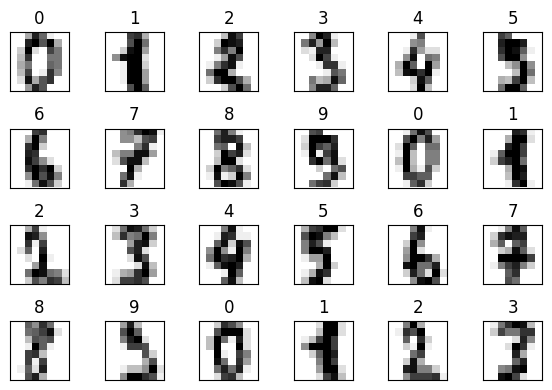

In [11]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

digits = load_digits()
#print(digits.DESCR)

# l'attributo target contiene le etichette
print(digits.target[::100])

# l'attributi data contiene i campioni
#l'attributo shape di data mostra il numero dei campioni e delle feature
print(digits.data.shape)
#l'attributo image, ovvero un vettore in cui ogni elemento è a sua volta un vettore  bidimensionale 8×8 che rappresenta la saturazione di ogni pixel dell’immagine
print(digits.images[13])


figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))
for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # rimuove le tacche sull'asse x
    axes.set_yticks([]) # rimuove le tacche sull'asse y
    axes.set_title(target)
    plt.tight_layout()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11)
knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train)
#KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=None, n_neighbors=5, p=2,weights='uniform')
predicted = knn.predict(X=X_test)
expected = y_test
print("previsti ",predicted[:20])
print("Expeted ",expected[:20])
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
print(wrong)

previsti  [0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 5 6]
Expeted  [0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 3 6]
[(np.int64(5), np.int64(3)), (np.int64(8), np.int64(9)), (np.int64(4), np.int64(9)), (np.int64(7), np.int64(3)), (np.int64(7), np.int64(4)), (np.int64(2), np.int64(8)), (np.int64(9), np.int64(8)), (np.int64(3), np.int64(8)), (np.int64(3), np.int64(8)), (np.int64(1), np.int64(8))]


In [13]:
print(f'{knn.score(X_test, y_test):.2%}')

confusion = confusion_matrix(y_true=expected, y_pred=predicted)
print(confusion)

97.78%
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  1  0  1  0  0]
 [ 0  0  0  0 49  0  0  1  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  1  1  2  0  0  0  0 39  1]
 [ 0  0  0  0  1  0  0  0  1 41]]


In [14]:
names = [str(digit) for digit in digits.target_names]
print(classification_report(expected, predicted,target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



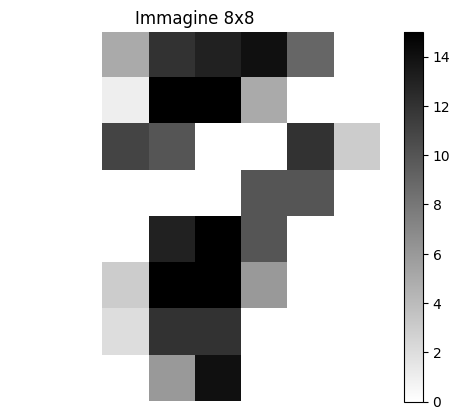

La previsione per questa immagine è: 7


In [15]:
new_image = [
    0, 0, 5, 12, 13, 14, 9, 0,
    0, 0, 1, 15, 15, 5, 0, 0,
    0, 0, 11, 10, 0, 0, 12, 3,
    0, 0, 0, 0, 0, 10, 10, 0,
    0, 0, 0, 13, 15, 10, 0, 0,
    0, 0, 3, 15, 15, 6, 0, 0,
    0, 0, 2, 12, 12, 0, 0, 0,
    0, 0, 0, 6, 14, 0, 0, 0
]

image_matrix = np.array(new_image).reshape(8, 8)

# Creare il grafico
plt.imshow(image_matrix, cmap=plt.cm.gray_r)  # Usa una mappa colori per il grigio
plt.colorbar()  # Aggiungi la barra dei colori
plt.title("Immagine 8x8")
plt.axis('off')  # Rimuovi le etichette sugli assi
plt.show()

new_image = np.array(new_image).reshape(1, -1)  # Converti in array 2D per l'input
predicted_label = knn.predict(new_image)
print(f"La previsione per questa immagine è: {predicted_label[0]}")
